# 유튜브 랭킹 시각화

In [33]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위 (1).csv


In [31]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [32]:
# 구독자수(문자열) --> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [33]:
def str2int(x):
    return int(x.replace(',',''))

In [34]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오 수 TOP 20 (채널명, 비디오수) 막대 그래프 만들기

In [35]:
df.sort_values(by='비디오수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,462,390,000","553,462",2500000,553462
706,뉴스/정치/사회,연합뉴스TV,"700,000","918,130,000","362,555",700000,362555
59,TV/방송,SBS Drama,"5,480,000","5,750,870,000","340,878",5480000,340878
56,TV/방송,SBS Entertainment,"5,720,000","6,664,750,000","216,725",5720000,216725
337,뉴스/정치/사회,KBS News,"1,320,000","1,844,530,000","176,159",1320000,176159
973,뉴스/정치/사회,Arirang News,"530,000","237,210,000","123,886",530000,123886
243,뉴스/정치/사회,JTBC News,"1,710,000","2,399,540,000","116,376",1710000,116376
290,뉴스/정치/사회,MBCNEWS,"1,500,000","3,383,580,000","115,414",1500000,115414
112,TV/방송,KBS Drama,"3,470,000","4,261,110,000","114,095",3470000,114095
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,672,520,000","111,308",1780000,111308


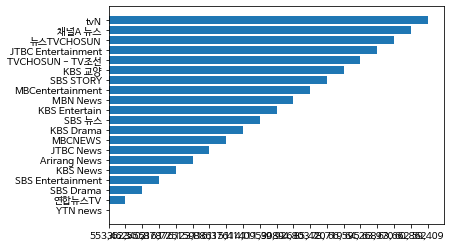

In [36]:
# pandas 시각화, 채널-인덱스, 비디오수2를 기준으로 내림차순 정렬, barh로 그리기 
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)

plt.barh(df2['채널명'], df2['비디오수'])
plt.show()

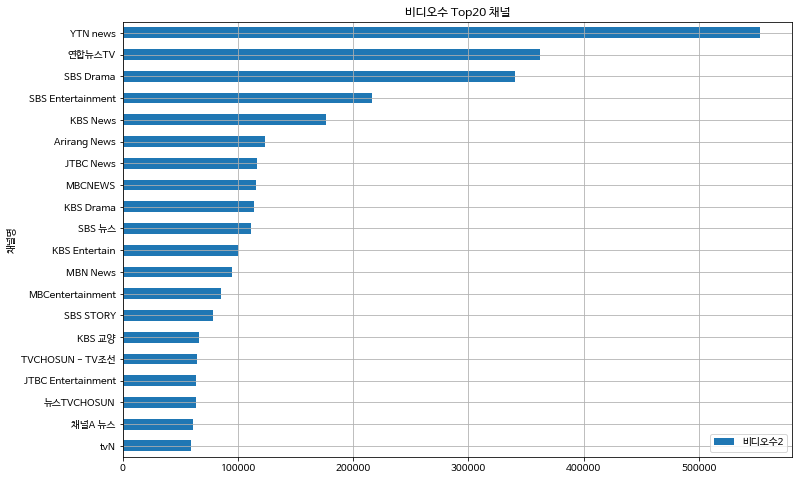

In [37]:
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

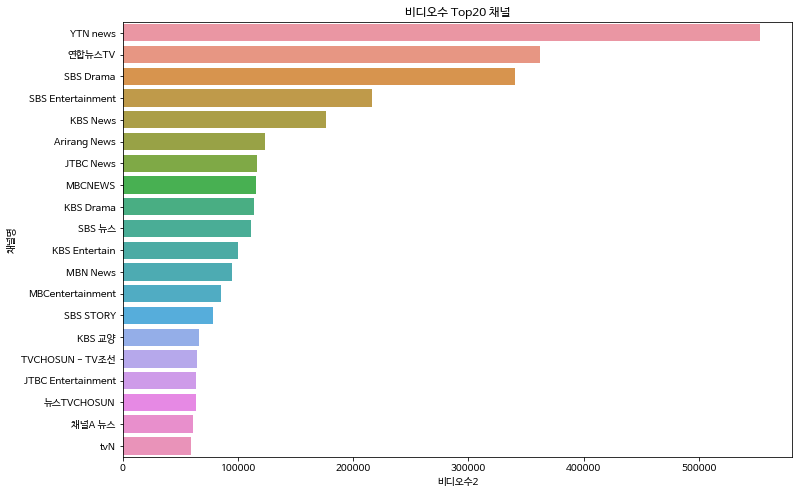

In [38]:
import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.show()

- 조회수 기준 TOP20 채널 시각화하기

In [39]:
df['조회수2'] = df.조회수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2,조회수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371,19003810000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654,18713050000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579,12194960000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729,21870920000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223,11052880000


In [40]:
df.sort_values(by='조회수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2,조회수2
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729,21870920000
6,음악/댄스/가수,1theK (원더케이),"23,200,000","20,599,350,000","14,983",23200000,14983,20599350000
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371,19003810000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654,18713050000
26,뉴스/정치/사회,MBCentertainment,"8,380,000","14,317,700,000","85,420",8380000,85420,14317700000
7,음악/댄스/가수,JYP Entertainment,"21,600,000","13,725,340,000","1,327",21600000,1327,13725340000
9,음악/댄스/가수,Mnet K-POP,"18,400,000","12,947,130,000","25,395",18400000,25395,12947130000
8,미분류,Coldplay,"19,300,000","12,771,640,000",279,19300000,279,12771640000
11,TV/방송,KBS WORLD TV,"16,600,000","12,358,210,000","52,362",16600000,52362,12358210000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579,12194960000


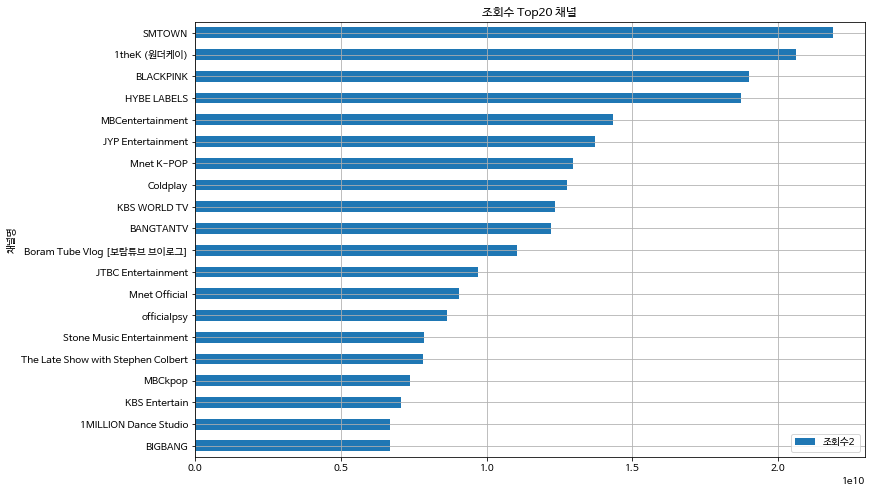

In [41]:
df3 = df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False)
df3.set_index('채널명', inplace=True)
df3.head(20).sort_values(by='조회수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('조회수 Top20 채널')
plt.show()

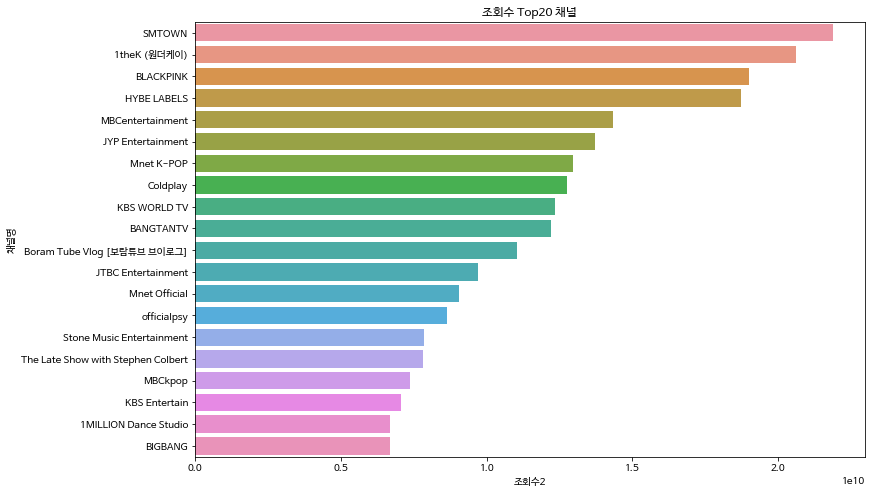

In [44]:
import seaborn as sns
df3 = df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='조회수2', data=df3.head(20))
plt.title('조회수 Top20 채널')
plt.show()

- 카테고리 수 분포

In [76]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


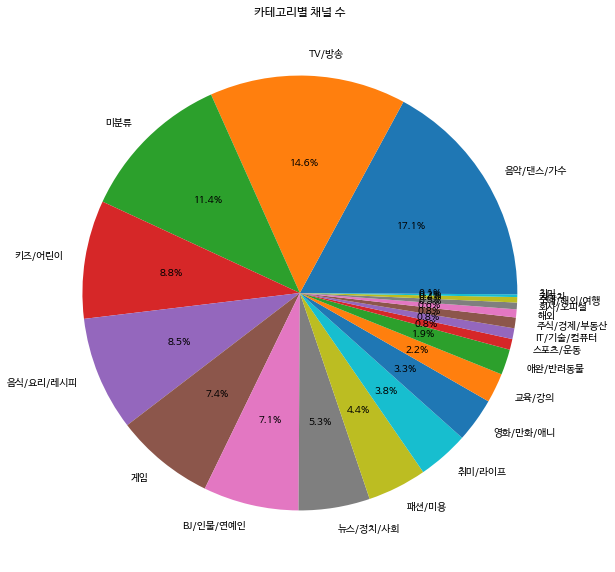

In [89]:
df4 = df.카테고리.value_counts().to_frame()

plt.figure(figsize=(30,10))
plt.pie(df4['카테고리'], labels=df4.index, data=df4, autopct='%1.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

- 카테고리별 구독자수 합계 시각화

In [82]:
df5 = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df5.columns = ['채널수', '구독자수_합계']
df5.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df5

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,674180000
키즈/어린이,88,257740000
TV/방송,146,229720000
음식/요리/레시피,85,180570000
미분류,114,143340000
BJ/인물/연예인,71,97560000
뉴스/정치/사회,53,71020000
게임,74,67170000
취미/라이프,38,47890000


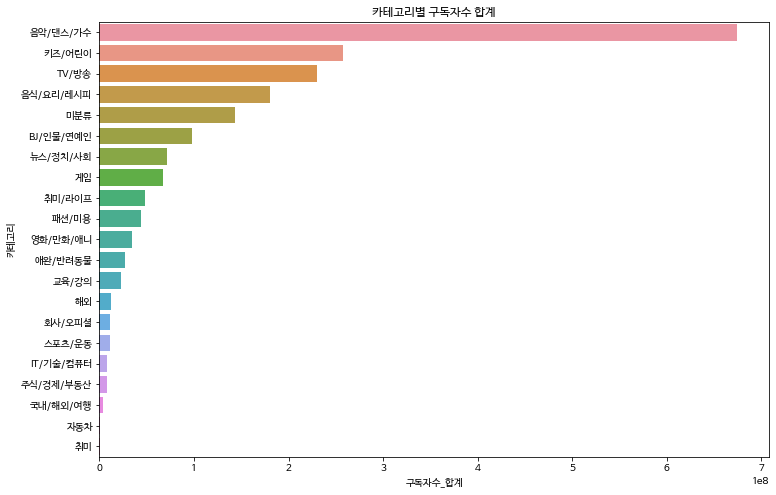

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df5.index, data=df5)
plt.title('카테고리별 구독자수 합계')
plt.show()